In [1]:
import sys
import glob

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sys.path.append("../")

from tools.amber import process_amber, process_multiple_amber_outputs

### Check single results from one csv

In [2]:
amber_results = process_amber.ProcessAmber(
    input_csv="files/amber_csvs/atp_mn.csv",
    sim_length=30,
    number_of_reps=10,
    trajectory_dump_frequency=5000,
    timestep=0.002,
)
amber_results.read_dataframe()

,#Frame,radius,distplot,rmsf,ligand_rmsd,C,CA,O,N,SASA
0,1,21.4732,0.0000,330.8972,1.7097,1.4017,1.4313,1.5536,1.3755,145.6393
1,2,21.4191,0.7265,66.3047,1.6900,1.3780,1.4116,1.5181,1.3639,152.0677
2,3,21.4207,0.7633,27.6175,1.7743,1.5056,1.5444,1.6285,1.4965,161.2295
3,4,21.5715,0.8172,38.6584,1.8000,1.3429,1.3687,1.4990,1.3266,146.5575
4,5,21.4218,0.8304,45.3229,1.7466,1.3305,1.3484,1.4692,1.3184,139.8167
...,...,...,...,...,...,...,...,...,...,...
30005,30006,21.2190,2.2328,0.0000,2.1806,1.9962,2.0446,2.1477,1.9726,150.6705
30006,30007,21.1925,2.1575,0.0000,2.2171,1.8676,1.9221,2.0189,1.8526,155.4705
30007,30008,21.1893,2.1540,0.0000,2.3921,1.8928,1.9378,2.0146,1.8838,152.6661
30008,30009,21.1325,2.1669,0.0000,2.1850,1.8343,1.8806,1.9925,1.8090,155.0024


In [3]:
amber_results.obtain_statistics_from_df()

,mean,std
radius,21.575684,0.183167
distplot,1.963703,0.241708
rmsf,0.717253,10.976248
ligand_rmsd,1.985644,0.337275
C,1.934988,0.294988
CA,1.978174,0.297122
O,2.047352,0.286170
N,1.930214,0.297144
SASA,167.190001,25.324562


### Peform full-data analysis

In [4]:
all_amber = process_multiple_amber_outputs.ProcessMultipleAmberOutputs(
    input_csvs = glob.glob('./files/amber_csvs/*.csv'),
    sim_length=30,
    number_of_reps=10,
    trajectory_dump_frequency=5000,
    timestep=0.002,
)

# all_amber.read_dataframe()

Make plots to see how did the calculations go

'Done!'

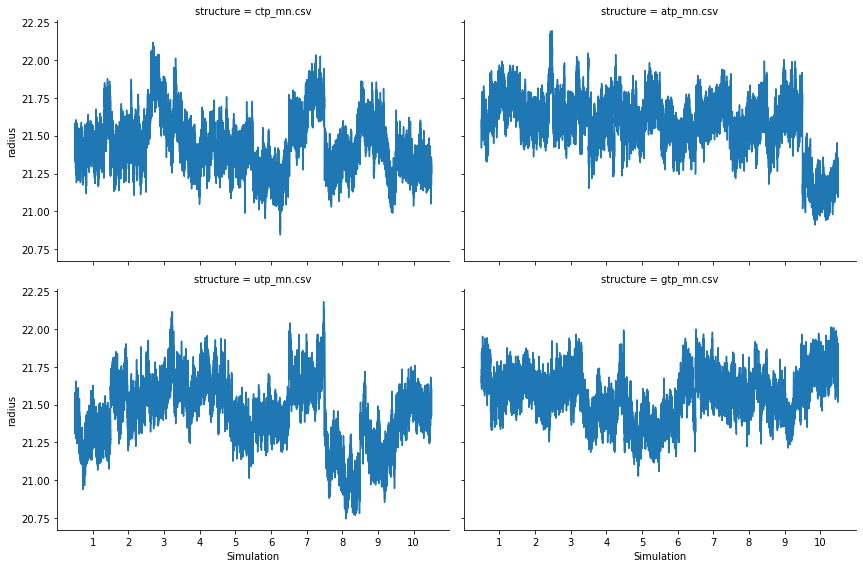

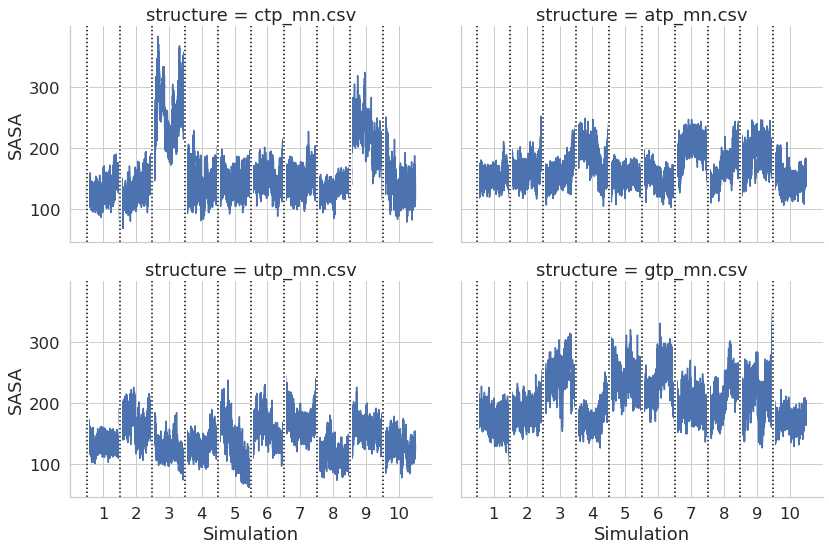

In [5]:
all_amber.plot_feature('radius', png=False)
all_amber.plot_feature('SASA', png=False, vertical_lines=True)

In [6]:
all_amber.analyze_feature('SASA')

,std,mean
structure,,
atp_mn.csv,25.32,167.19
ctp_mn.csv,48.16,159.31
gtp_mn.csv,35.12,204.86
utp_mn.csv,26.65,141.44
